<a href="https://colab.research.google.com/github/PriyankaKumari-123-82/DAA/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.tanh(self.Z1)  # Use tanh activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)  # Softmax for multi-class
        return self.A2

    def softmax(self, z):
      return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def backward(self, X, Y, learning_rate):
        m = X.shape[0]
        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(self.A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * (1 - np.power(self.A1, 2)) # Derivative of tanh
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W1 = self.W1 - learning_rate * dW1
        self.b1 = self.b1 - learning_rate * db1
        self.W2 = self.W2 - learning_rate * dW2
        self.b2 = self.b2 - learning_rate * db2

    def train(self, X, Y, epochs, learning_rate):
      for i in range(epochs):
        self.forward(X)
        self.backward(X, Y, learning_rate)

        if i % 100 == 0:
          predictions = np.argmax(self.A2, axis=1)
          accuracy = np.mean(predictions == np.argmax(Y,axis =1))
          print(f"Epoch {i}, Accuracy: {accuracy}")
      print("Training finished.")


# Example usage (assuming you have loaded the MNIST dataset into X and Y)
# X is the input features (784 pixels)
# Y is the one-hot encoded labels (10 classes)
# Example data (replace with MNIST data loading)
X = np.random.rand(60000, 784)
Y = np.eye(10)[np.random.randint(0, 10, 60000)]


# Initialize the neural network
nn = NeuralNetwork(input_size=784, hidden_size=64, output_size=10)

# Train the network
nn.train(X, Y, epochs=1000, learning_rate=0.1)

Epoch 0, Accuracy: 0.0991
Epoch 100, Accuracy: 0.103
Epoch 200, Accuracy: 0.10411666666666666
Epoch 300, Accuracy: 0.10501666666666666
Epoch 400, Accuracy: 0.10571666666666667
Epoch 500, Accuracy: 0.1064
Epoch 600, Accuracy: 0.10798333333333333
Epoch 700, Accuracy: 0.10985
Epoch 800, Accuracy: 0.11301666666666667
Epoch 900, Accuracy: 0.11563333333333334
Training finished.


Final Accuracy: 0.1194


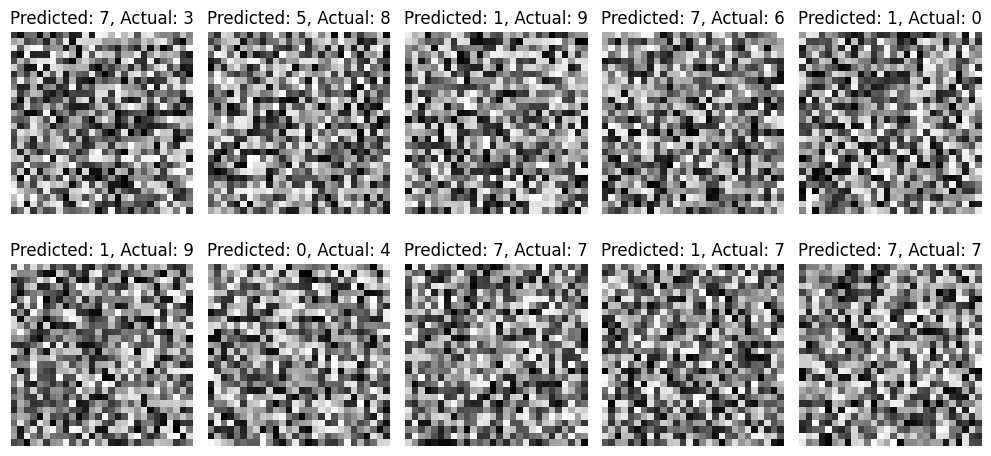

In [3]:
# prompt: plot this

import matplotlib.pyplot as plt

# Assuming 'nn' is your trained neural network object and 'X' and 'Y' are your data
# Get predictions for the entire dataset
predictions = np.argmax(nn.forward(X), axis=1)

# Calculate accuracy
accuracy = np.mean(predictions == np.argmax(Y, axis=1))
print(f"Final Accuracy: {accuracy}")


# Plot some sample predictions (optional)
plt.figure(figsize=(10, 5))
for i in range(10):  # Plot the first 10 images
  plt.subplot(2, 5, i + 1)
  plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Assuming 28x28 images
  plt.title(f"Predicted: {predictions[i]}, Actual: {np.argmax(Y[i])}")
  plt.axis('off')

plt.tight_layout()
plt.show()